In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.optim as optim
from lr_finder import LRFinder
import models.cifar as models
from datasets import Dataset
from vogn import VOGN
import warnings
warnings.filterwarnings('ignore')

In [109]:
log_file = 'result/alexnetbn_vogn_state4.log'

In [110]:
def log_to_pd(log_file):
    train_list = []
    test_list = []
    train_labels = None
    test_labels = None
    with open(log_file, 'r') as file:
        lines = file.read().splitlines()
        for line in lines:
            line = line.split(',')
            if len(line) == 8:
                train_list.append([int(line[1]), int(line[3]), float(line[5]), float(line[7])])
                if train_labels is None:
                    train_labels = [line[0], line[2], line[4], line[6]]
            else:
                test_list.append([int(line[1]), int(line[3]), float(line[5]), float(line[7]),
                                  float(line[9]), float(line[11]), float(line[13])])
                if test_labels is None:
                    test_labels = [line[0], line[2], line[4], line[6], line[8], line[10], line[12]]
    train_pd = pd.DataFrame.from_records(train_list, columns=train_labels)
    test_pd = pd.DataFrame.from_records(test_list, columns=test_labels)
    return train_pd, test_pd

def state_log_to_pd(log_file):
    state_list = []
    state_label = None
    with open(log_file, 'r') as file:
        lines = file.read().splitlines()
        for line in lines:
            line = line.split(',')
            #print(line)
            state_list.append([int(line[1]), int(line[3]), float(line[5]), float(line[7]), float(line[9]), float(line[11]), float(line[13])])
            if state_label is None:
                state_label = [line[0], line[2], line[4], line[6], line[8], line[10], line[12]]
    state_pd = pd.DataFrame.from_records(state_list, columns=state_label)
    return state_pd

In [118]:
vogn1_train, vogn1_test = log_to_pd('result/alexnetbn_sgd.log')
vogn1_state = state_log_to_pd(log_file)

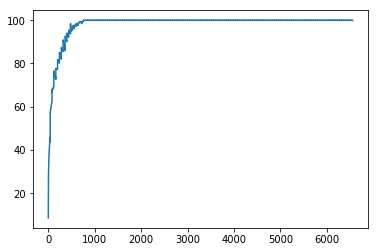

In [119]:
plt.plot(vogn1_train.accuracy)

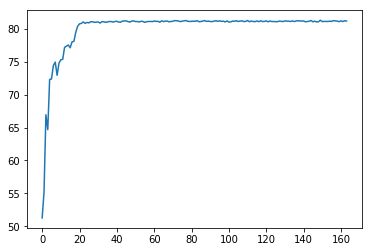

In [120]:
plt.plot(vogn1_test.test_accuracy)

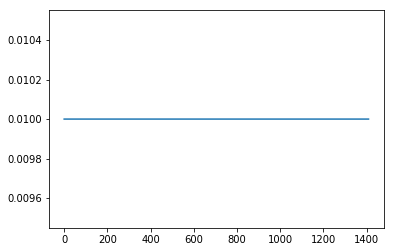

In [114]:
plt.plot(vogn1_state.lr)

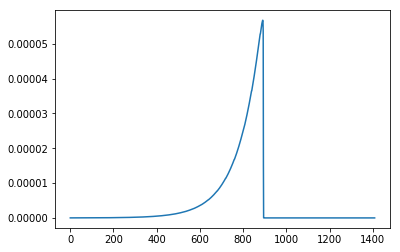

In [115]:
plt.plot(vogn1_state.lr / vogn1_state.prec_mean)

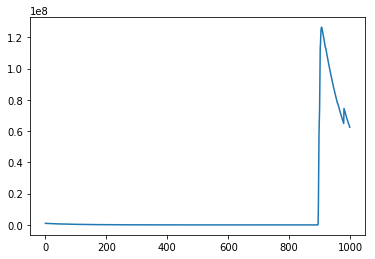

In [117]:
plt.plot(vogn1_state.prec_mean[:1000])